<a href="https://colab.research.google.com/github/Eng-Samyle/TELECOM-X-II/blob/main/TELECOM_X2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas iniciais

In [136]:
import pandas as pd
import numpy as np

# Importando os dados

In [137]:
dados = 'https://raw.githubusercontent.com/Eng-Samyle/TELECOM-X-II/refs/heads/main/Telecom_XII.csv'
dados = pd.read_csv(dados)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,no,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,no,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [138]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [139]:
dados = dados.drop(['customerID'], axis=1)
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,no,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,no,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Separando as váriaveis

In [140]:
y = dados['Churn']
X = dados.drop(['Churn'], axis=1)

## Transformar a variável alvo

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
label_encoder = LabelEncoder()

In [143]:
y_encoded = label_encoder.fit_transform(y)

In [144]:
y = pd.Series(y_encoded, index=y.index, name='Churn')

In [145]:
y.unique()

array([0, 1])

## Transformando as variáveis explicativas

In [146]:
from sklearn.preprocessing import StandardScaler

### Trabalhando colunas binárias

In [147]:
colunas_binarias = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling'
]
le = LabelEncoder()
for coluna in colunas_binarias:
    X[coluna] = le.fit_transform(X[coluna])


###Trabalhando colunas multi-Categoricas

In [148]:
colunas_multi_categoria = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaymentMethod'
]
X = pd.get_dummies(X, columns=colunas_multi_categoria, drop_first=True, dtype=int)

### Trabalhando as colunas numéricas

In [149]:
colunas_numericas_para_escalar = ['tenure', 'Charges.Monthly', 'Charges.Total']
for coluna in colunas_numericas_para_escalar:
    X[coluna] = X[coluna].replace(' ', pd.NA)
    X[coluna] = pd.to_numeric(X[coluna], errors='coerce')
    mediana =  X[coluna].median()
    X[coluna].fillna(mediana, inplace=True)

scaler = StandardScaler()
X[colunas_numericas_para_escalar] = scaler.fit_transform(X[colunas_numericas_para_escalar])

/tmp/ipython-input-3450218119.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[coluna].fillna(mediana, inplace=True)


In [150]:
colunas_numericas_para_escalar = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X[colunas_numericas_para_escalar] = scaler.fit_transform(X[colunas_numericas_para_escalar])

###Verificando se todos os dados foram 'tratados'

In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   Charges.Monthly                        7043 non-null   float64
 8   Charges.Total                          7043 non-null   float64
 9   MultipleLines_No phone service         7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

In [152]:
for coluna in X.columns:
  print(f'{coluna}: {X[coluna].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
tenure: [-0.95168167 -1.15528349 -0.78880022 -1.19600386  1.57298088  1.24721797
 -1.0331224   1.32865869  0.88073469  1.61370124 -1.11456313  0.96217542
  0.06632742 -1.27744458  0.51425142  0.71785324 -0.38159658  0.92145506
 -0.25943549  1.49154015  0.18848851  0.67713287  1.36937906  1.41009942
 -0.50375767  0.43281069  1.08433651 -0.82952058 -0.21871513 -1.23672422
 -0.30015585 -0.1372744  -0.74807986  0.10704778  1.28793833  0.26992924
  0.3106496  -0.87024095 -1.07384277 -0.09655404  1.53226051  1.00289578
  1.04361615 -0.66663913 -0.01511331  0.02560706 -0.91096131 -0.46303731
  1.16577724 -0.70735949  0.47353106 -0.42231695 -0.34087622 -0.54447804
  0.59569215  1.2064976   0.55497178  0.79929397 -0.99240204  1.12505688
  0.63641251 -0.17799476  0.35136997  0.84001433  1.45081979 -0.05583367
  0.14776815 -0.62591876 -0.5851984   0.7585736   0.22920887  0.39209033
 -1.31816495]
PhoneService: [1 0]
PaperlessBilli

#Treinando o modelo

In [153]:
from sklearn.model_selection import train_test_split

# Divida os dados em 80% para treino e 20% para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

###Verificando a correlação entre os dados

In [154]:
matriz_correlacao_X = X.corr()
print(matriz_correlacao_X)

                                         gender  SeniorCitizen   Partner  \
gender                                 1.000000      -0.001874 -0.001808   
SeniorCitizen                         -0.001874       1.000000  0.016479   
Partner                               -0.001808       0.016479  1.000000   
Dependents                             0.010517      -0.211185  0.452676   
tenure                                 0.005106       0.016567  0.379697   
PhoneService                          -0.006488       0.008576  0.017706   
PaperlessBilling                      -0.011754       0.156530 -0.014877   
Charges.Monthly                       -0.014569       0.220173  0.096848   
Charges.Total                         -0.000002       0.102652  0.318364   
MultipleLines_No phone service         0.006488      -0.008576 -0.017706   
MultipleLines_Yes                     -0.008414       0.142948  0.142057   
InternetService_Fiber optic           -0.011286       0.255338  0.000304   
InternetServ

###Remover as colunas que possuí multicolinearidade

In [155]:
# Crie uma lista com as colunas redundantes que você quer remover
colunas_para_remover = [
    'StreamingTV_No internet service',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'StreamingMovies_No internet service',
    'TechSupport_No internet service','Charges.Total','MultipleLines_No phone service'
]

# Remova as colunas do seu DataFrame X
X.drop(colunas_para_remover, axis=1, inplace=True)

# Verifique se as colunas foram removidas
print(X.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'Charges.Monthly',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


#Começando a treinar

####Modelo aleatório

In [156]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_aleatorio = DummyClassifier(strategy='uniform', random_state=42)
modelo_aleatorio.fit(X_treino, y_treino)

previsoes_aleatorias = modelo_aleatorio.predict(X_teste)
acuracia_aleatoria = accuracy_score(y_teste, previsoes_aleatorias)

print(f"Acurácia do modelo aleatório: {acuracia_aleatoria:.4f}")

Acurácia do modelo aleatório: 0.4904


### Modelo KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=12)
modelo_knn.fit(X_treino, y_treino)

print("Modelo KNN treinado com sucesso!")

Modelo KNN treinado com sucesso!


Acurácia do modelo KNN: 0.7800


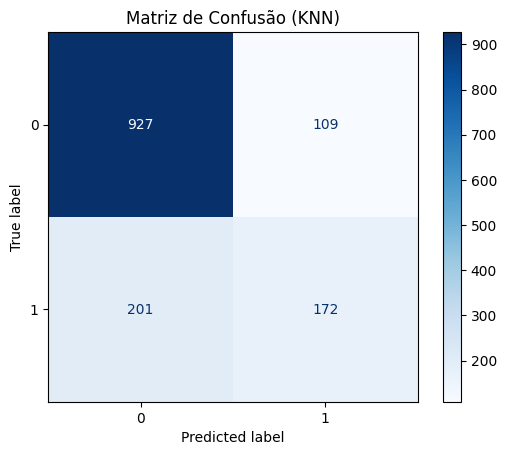

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

previsoes_knn = modelo_knn.predict(X_teste)
acuracia_knn = accuracy_score(y_teste, previsoes_knn)

print(f"Acurácia do modelo KNN: {acuracia_knn:.4f}")

matriz_confusao_knn = confusion_matrix(y_teste, previsoes_knn)
visualizacao_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_knn)

visualizacao_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (KNN)')
plt.show()

####Modelo de Árvore de decisão

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_arvore = DecisionTreeClassifier(max_depth=7, random_state=42)
modelo_arvore.fit(X_treino, y_treino)

print("Modelo de Árvore de Decisão treinado com sucesso!")

Modelo de Árvore de Decisão treinado com sucesso!


In [160]:
previsoes = modelo_arvore.predict(X_teste)
acuracia = accuracy_score(y_teste, previsoes)

print(f"A acurácia do modelo de Árvore de Decisão é: {acuracia:.4f}")

A acurácia do modelo de Árvore de Decisão é: 0.7835


#####Avaliando a performace do modelo treinado

In [161]:
previsoes_treino = modelo_arvore.predict(X_treino)
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print(f"Acurácia nos dados de treino: {acuracia_treino:.4f}")

previsoes_teste = modelo_arvore.predict(X_teste)
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print(f"Acurácia nos dados de teste: {acuracia_teste:.4f}")

Acurácia nos dados de treino: 0.8181
Acurácia nos dados de teste: 0.7835


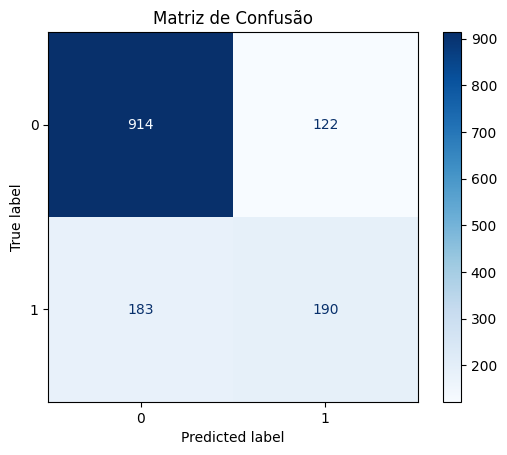

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_teste, previsoes)
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)

visualizacao.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

####Influência de cada variável no modelo treinado

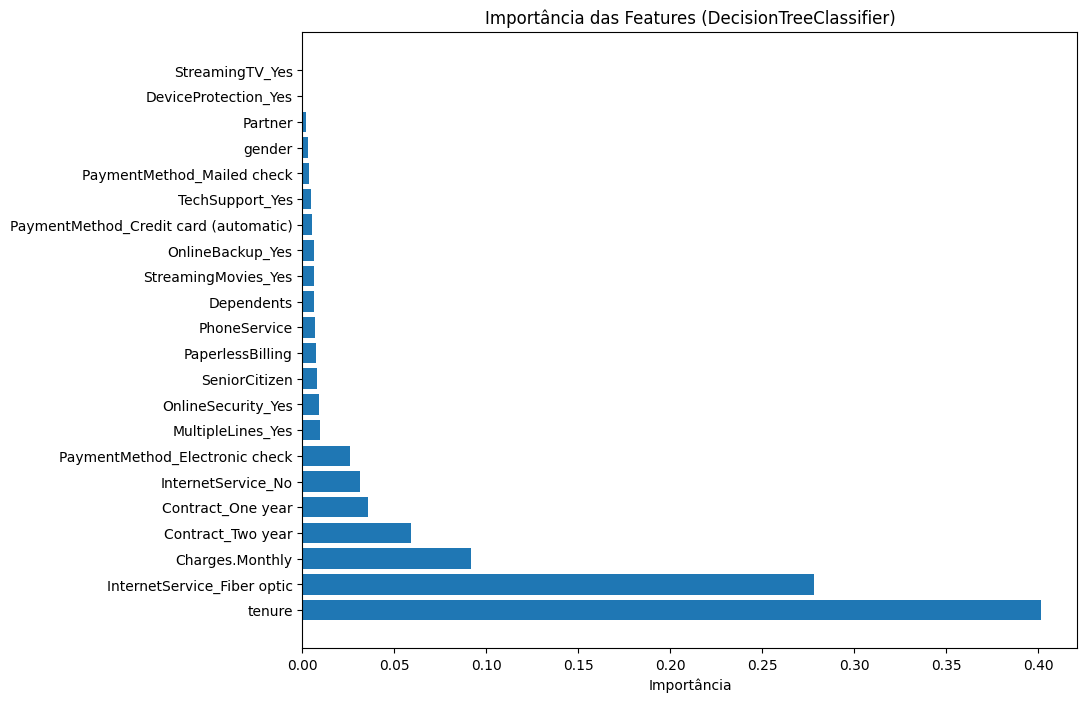

As 10 features mais importantes são:
                           Feature  Importancia
4                           tenure     0.401335
9      InternetService_Fiber optic     0.277992
7                  Charges.Monthly     0.091620
18               Contract_Two year     0.059061
17               Contract_One year     0.035365
10              InternetService_No     0.031466
20  PaymentMethod_Electronic check     0.025891
8                MultipleLines_Yes     0.009275
11              OnlineSecurity_Yes     0.008895
1                    SeniorCitizen     0.007822


In [163]:
importancias = modelo_arvore.feature_importances_

df_importancias = pd.DataFrame({'Feature': X.columns, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_importancias['Feature'], df_importancias['Importancia'])
plt.xlabel('Importância')
plt.title('Importância das Features (DecisionTreeClassifier)')
plt.show()

print("As 10 features mais importantes são:")
print(df_importancias.head(10))

###Treinando o modelo Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
modelo_random_forest.fit(X_treino, y_treino)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


###Avaliando a performace do modelo treinado

Acurácia do modelo Random Forest: 0.8048


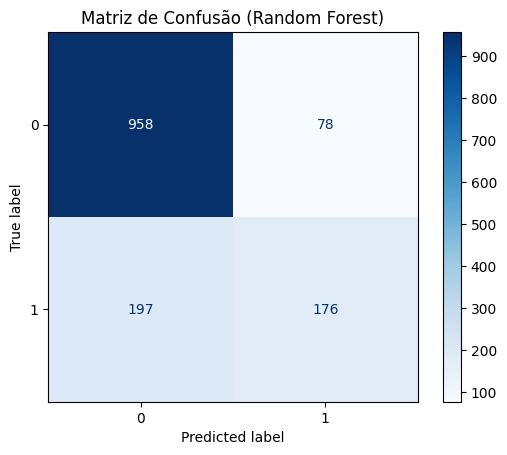

In [165]:
from sklearn.ensemble import RandomForestClassifier

previsoes_rf = modelo_random_forest.predict(X_teste)
acuracia_rf = accuracy_score(y_teste, previsoes_rf)
print(f"Acurácia do modelo Random Forest: {acuracia_rf:.4f}")

matriz_confusao_rf = confusion_matrix(y_teste, previsoes_rf)
visualizacao_rf = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_rf)

visualizacao_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (Random Forest)')
plt.show()

####Influência de cada variável no modelo treinado

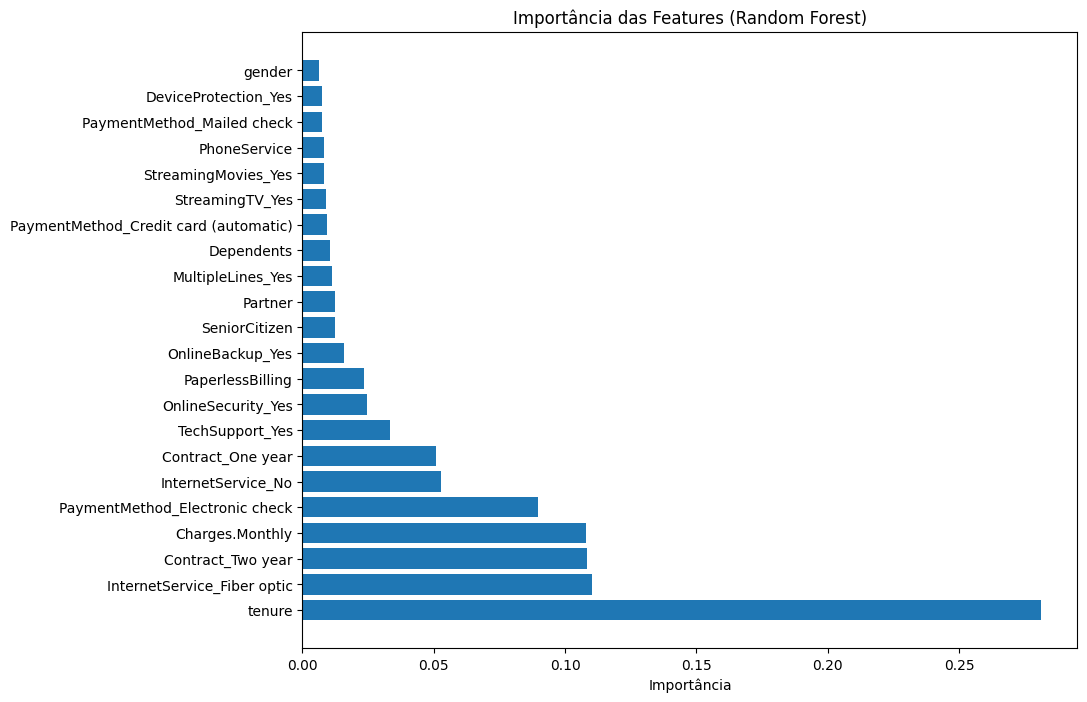

As 10 features mais importantes são:
                           Feature  Importancia
4                           tenure     0.281060
9      InternetService_Fiber optic     0.110371
18               Contract_Two year     0.108255
7                  Charges.Monthly     0.108082
20  PaymentMethod_Electronic check     0.089606
10              InternetService_No     0.052654
17               Contract_One year     0.050677
14                 TechSupport_Yes     0.033220
11              OnlineSecurity_Yes     0.024711
6                 PaperlessBilling     0.023579


In [166]:
importancias = modelo_random_forest.feature_importances_

df_importancias = pd.DataFrame({'Feature': X.columns, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_importancias['Feature'], df_importancias['Importancia'])
plt.xlabel('Importância')
plt.title('Importância das Features (Random Forest)')
plt.show()

print("As 10 features mais importantes são:")
print(df_importancias.head(10))